# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. 
- Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
- Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
#from pymystem3 import Mystem

## Шаг 1. Общая информация

In [2]:
try: 
    data=pd.read_csv('/datasets/data.csv')
except: 
    data=pd.read_csv('datasets/data.csv')

In [3]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


- Все столбцы таблицы названы корректно, переименование не требуется. 
- Есть пропуски в данных о трудовом стаже в днях и общем доходе, их доля существенна (10%) и количество совпадает. Удалить их и не принимать их в расчет при анализе данных нельзя.
- __Вывод: Требуется работа с пропусками в данных и поиск дубликатов.__

Просмотрим подробнее данные по столбцам, уникальные значения, наличие пропусков и т.д. 

In [5]:
#так может выглядеть функция для категориальных переменных
def category_function (column):
        list_name=data[column].unique()
        print ('Уникальные значения столбца: ', *list_name, sep='|')
        print()
        
#так может выглядеть функция для количественных переменных
def q_function (column): 
    print('Минимальное значение: ', data[column].min(), ', максимальное значение:', data[column].max(), sep='')
    print('Пропущенных значений: ', data[column].isna().sum())
    print()

In [6]:
cat_columns = ['education', 'family_status', 'gender', 'income_type', 'purpose']
q_columns = ['children', 'days_employed', 'dob_years', 'total_income']

In [7]:
for column in cat_columns: 
    category_function(column)

Уникальные значения столбца: |высшее|среднее|Среднее|СРЕДНЕЕ|ВЫСШЕЕ|неоконченное высшее|начальное|Высшее|НЕОКОНЧЕННОЕ ВЫСШЕЕ|Неоконченное высшее|НАЧАЛЬНОЕ|Начальное|Ученая степень|УЧЕНАЯ СТЕПЕНЬ|ученая степень

Уникальные значения столбца: |женат / замужем|гражданский брак|вдовец / вдова|в разводе|Не женат / не замужем

Уникальные значения столбца: |F|M|XNA

Уникальные значения столбца: |сотрудник|пенсионер|компаньон|госслужащий|безработный|предприниматель|студент|в декрете

Уникальные значения столбца: |покупка жилья|приобретение автомобиля|дополнительное образование|сыграть свадьбу|операции с жильем|образование|на проведение свадьбы|покупка жилья для семьи|покупка недвижимости|покупка коммерческой недвижимости|покупка жилой недвижимости|строительство собственной недвижимости|недвижимость|строительство недвижимости|на покупку подержанного автомобиля|на покупку своего автомобиля|операции с коммерческой недвижимостью|строительство жилой недвижимости|жилье|операции со своей недвижимостью

In [8]:
for column in q_columns: 
    q_function(column)

Минимальное значение: -1, максимальное значение:20
Пропущенных значений:  0

Минимальное значение: -18388.949900568383, максимальное значение:401755.40047533
Пропущенных значений:  2174

Минимальное значение: 0, максимальное значение:75
Пропущенных значений:  0

Минимальное значение: 20667.26379327158, максимальное значение:2265604.028722744
Пропущенных значений:  2174



In [9]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


<AxesSubplot:>

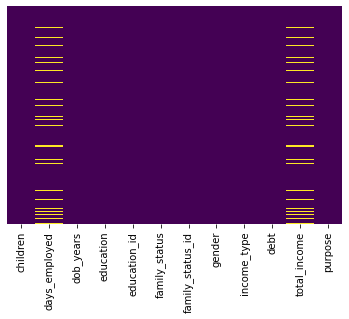

In [10]:
sns.heatmap(
    data.isnull(),
    yticklabels=False,
    cbar=False,
    cmap='viridis')

###### Вывод

 - Данные о семейном статусе заполнены все, пропусков нет, дубликатов в перечне уникальных значений нет. 
 - Данные о видах занятости заполнены все, пропусков нет, дубликатов в перечне уникальных значений нет.  
 - Данные о поле заполнены некорректно (есть третья величина).
 - Данные о количестве детей содержат отрицательную величину.
 - Данные об образовании содержат дубликаты в перечне уникальных значений. 
 - Данные о трудовом стаже содержат некорректные данные (отрицательные).
 - Данные о возрасте содержат как минимум нулевые данные, требуется дополнительное исследование, нет ли данных о возрасте менее 18 лет.

__Как определим факт погашения кредита в срок?__ 
- Будем рассматривать эту задачу как нахождение доли клиентов с наличием / отсутствием долга (debt) среди общего числа клиентов по группам данных о семейном положении и количестве детей и искать взаимосвязь, сделав сводные таблицы, которые будут визуально пригодны для выводов. 
- ! Мы никак не оцениваем взаимосвязь размера долга и длительности просрочек, т.к. размер долга в данных не указан, указан только факт его наличия (1) или отсутствия (0).

# Вывод

Требуется предобработка данных: обработка пропусков, дублей, выделение столбцов с категориями для формирования в дальнейшем сводных таблиц.

## Предобработка данных

### Обработка пропусков

#### Исправим данные о поле клиента

Найдем количество строк с некорректным полом.

In [11]:
data.loc[data['gender']=='XNA']['gender'].count()

1

Т.к. это всего 1 строка из 21595, менее 0,005%, заменим данные пола этого клиента на мужской

In [12]:
data.loc[data['gender'] == 'XNA', 'gender'] = 'M'
data['gender'].unique()

array(['F', 'M'], dtype=object)

#### Исправим данные о количестве детей

In [13]:
data.children.value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Найдем количество строк с количеством детей, равным "-1"

In [14]:
print(data.loc[data.loc[:, 'children']==-1]['children'].count())

47


Т.к. 47 из 21525 срок составляет лишь 0.2%, заменим данные с "-1" на "1", т.к. вероятнее всего, это техническая опечатка

In [15]:
data.loc[data['children'] == -1, 'children'] = 1
data['children'].unique()

array([ 1,  0,  3,  2,  4, 20,  5], dtype=int64)

Некорректно заполненные данные о количестве детей исправлены.

У клиента вполне может быть 20 детей, если это семейный детский дом, например. Таких записей 76 (0.35%), проверили ячейкой выше, их можно было бы и оставить, особенно с учетом того, что мы относим 20 детей к категории "более 3 детей" в дальнейшем. 
Однако признаем 20 детей опечаткой (20 вместо 2) и исправим код соответственно. 

In [16]:
data.loc[data['children']==20, 'children'] = 2

In [17]:
data['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

#### Проверим и исправим данные о возрасте клиентов

Мы знаем, что есть нулевые данные о возрасте, поищем иные ошибки - например, возраст менее 18 лет.

In [18]:
print ('Перечень возрастов клиентов:', *(data['dob_years'].unique()))
print ('Количество клиентов с возрастом менее 18 лет: ', data.loc[data['dob_years']<18]['dob_years'].count())
print ('Количество клиентов с возрастом 0: ', data.loc[data['dob_years']==0]['dob_years'].count())

Перечень возрастов клиентов: 42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51 0 59 29 60 55 58 71 22 73 66 69 19 72 70 74 75
Количество клиентов с возрастом менее 18 лет:  101
Количество клиентов с возрастом 0:  101


Проверим медиану и среднее, чтобы понять, как лучше заполнить недостающие данные о возрасте.

In [19]:
dob_years_med=data['dob_years'].median()
dob_years_avg=data['dob_years'].mean()
print('Медиана: {:.0f}'.format(dob_years_med))
print('Среднее: {:.0f}'.format(dob_years_avg))

Медиана: 42
Среднее: 43


Т.к. 101 запись из 21525 это менее 0.5%, заменим эти данные на медиану, которая в данном случае почти равна среднему.

In [20]:
data.loc[data['dob_years']==0, 'dob_years']=dob_years_med
print ('Количество клиентов с возрастом менее 18 лет: ', data.loc[data['dob_years']<18]['dob_years'].count())
print ('Количество клиентов с возрастом 0: ', data.loc[data['dob_years']==0]['dob_years'].count())

Количество клиентов с возрастом менее 18 лет:  0
Количество клиентов с возрастом 0:  0


Данные о возрасте исправлены.

#### Проверим и исправим данные о трудовом стаже 

Посмотрев ранее на максимум и минимум по этому показателю, видим, что они некорректны: есть стаж, превышающий возраст в разы, есть отрицательный стаж. 

Проверим строки, стаж в которых превышает возраст. 

In [21]:
data.loc[data['days_employed']>(data['dob_years']*365)]['days_employed'].count

<bound method Series.count of 4        340266.072047
18       400281.136913
24       338551.952911
25       363548.489348
30       335581.668515
             ...      
21505    338904.866406
21508    386497.714078
21509    362161.054124
21518    373995.710838
21521    343937.404131
Name: days_employed, Length: 3445, dtype: float64>

Проверим, сколько строк, стаж в которых отрицателен.

In [22]:
data.loc[data['days_employed']<0]['days_employed'].count

<bound method Series.count of 0       -8437.673028
1       -4024.803754
2       -5623.422610
3       -4124.747207
5        -926.185831
            ...     
21519   -2351.431934
21520   -4529.316663
21522   -2113.346888
21523   -3112.481705
21524   -1984.507589
Name: days_employed, Length: 15906, dtype: float64>

В условиях того, что 3445+15906=19351 запись (а именно, все имеющиеся записи кроме NaN) либо превышают даже возраст клиента, либо отрицательны, а также учитывая то, что ответ на вопросы исследования не базируется на данных о трудовом стаже, заменим стаж на максимально возможный, а именно на величину возраста за вычетом 18 лет. 

In [23]:
data.loc[data['days_employed']>(data['dob_years']-18)*365, 'days_employed']=(data['dob_years']-18)*365
data.loc[data['days_employed']<0, 'days_employed']=(data['dob_years']-18)*365
data['days_employed']=data['days_employed'].fillna(0)

In [24]:
print('Количество пропусков в данных о трудовом стаже: ', data['days_employed'].isna().sum())

Количество пропусков в данных о трудовом стаже:  0


Скорректировали данные о трудовом стаже, хотя это и те данные, которые мы не используем при ответе на вопросы исследования.

#### Проверим и исправим данные о доходе

Этот параметр мы используем при ответе на вопросы исследования. 

In [25]:
print('Пропущенных значений о доходе: ', data['total_income'].isna().sum())

Пропущенных значений о доходе:  2174


Найдем медиану дохода по виду деятельности (income_type).

In [26]:
data_grouped_by_income_type=data.groupby('income_type')['total_income'].median()
print(data_grouped_by_income_type)

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64


Сделаем из перечня уникальных значений видов занятости список.

In [27]:
income_types_list=np.array(data['income_type'].unique()).tolist()
print(*income_types_list, sep=', ')

сотрудник, пенсионер, компаньон, госслужащий, безработный, предприниматель, студент, в декрете


Пройдемся по списку и для каждого вида деятельности заменим пропущенное значение в столбце total_income на медиану по группе.

In [28]:
for name in income_types_list: 
    data.loc[data['income_type']==name,'total_income']=data.loc[data['income_type']==name,'total_income'].fillna(data.loc[data['income_type']==name,'total_income'].median())

In [29]:
data['total_income'].isna().sum()

0

Проверим теперь медиану дохода по виду деятельности (income_type).

In [30]:
data_grouped_by_income_type=data.groupby('income_type')['total_income'].median()
print(data_grouped_by_income_type)

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64


Данные о доходах исправили на основании медианных значений по виду деятельности клиента. 

__Вопросы к тому, кто предоставил данные:__

- По количеству пропуски о доходе равны пропуска в трудовом стаже. Вряд ли возможно, что при получении кредита клиент не указал трудовой стаж и не указал свой доход, и все равно был одобрен как заемщик. Возможно, эти данные должны были быть подгружены из справок, но подгружены не были?

### Замена типа данных

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Превратим количество дней стажа и возраст клиента в целое число.

In [32]:
data['days_employed']=data['days_employed'].astype('int')
data['dob_years']=data['dob_years'].astype('int')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  int32  
 2   dob_years         21525 non-null  int32  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(1), int32(2), int64(4), object(5)
memory usage: 1.8+ MB


**Вывод**

Типы данных приведены в соответствие с логикой, числа с плавающей запятой в кол-ве дней стажа и возраста переведены в целые. Строки (категории) имеют строковый тип данных, количественные значения - int, float. 

### Обработка дубликатов

Есть дубликаты в названиях видов образования.

In [34]:
print(data['education'].unique())

['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']


Дубликаты в названии образования взялись, вероятно, оттого, что в анкете это поле заполняется вручную, а не выбирается одна из категорий выпадающего списка, поэтому каждый клиент вводил данные так, как хотел. Оптимизируем код с учетом замечания, закомментировав в ячейках выше исправления, внесенные вручную. Проверим результат. 

In [35]:
data['education']=data['education'].str.lower()
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Устранили дубликаты в названиях видов образования. Также это можно было сделать через замену значения ячейки, используя как базу education_id.

Проверим наличие полных дубликатов строк.

In [36]:
print(data.duplicated().sum())

72


Доля дубликатов составляет 0,33% от всех данных, и вероятность полного совпадения настоящих клиентов друг с другом по такому большому числу параметров очень мала. 
Дубликаты можно удалить. Причина появления дубликатов, возможно, повторное занесение анкет клиентов или случайная повторная отправка (сохранение) их анкет. 

In [37]:
data=data.drop_duplicates().reset_index(drop=True)
print(data.duplicated().sum())

0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21453 non-null  int64  
 1   days_employed     21453 non-null  int32  
 2   dob_years         21453 non-null  int32  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      21453 non-null  float64
 11  purpose           21453 non-null  object 
dtypes: float64(1), int32(2), int64(4), object(5)
memory usage: 1.8+ MB


**Вывод**

В данных нет пропусков и дубликатов. Типы данных приведены в соответствие с их содержанием. 

### Лемматизация

Просмотрим, сколько вариантов целей взятия кредита содержится в данных.

In [39]:
purpose_list=data['purpose'].unique().tolist()
purpose_list

['покупка жилья',
 'приобретение автомобиля',
 'дополнительное образование',
 'сыграть свадьбу',
 'операции с жильем',
 'образование',
 'на проведение свадьбы',
 'покупка жилья для семьи',
 'покупка недвижимости',
 'покупка коммерческой недвижимости',
 'покупка жилой недвижимости',
 'строительство собственной недвижимости',
 'недвижимость',
 'строительство недвижимости',
 'на покупку подержанного автомобиля',
 'на покупку своего автомобиля',
 'операции с коммерческой недвижимостью',
 'строительство жилой недвижимости',
 'жилье',
 'операции со своей недвижимостью',
 'автомобили',
 'заняться образованием',
 'сделка с подержанным автомобилем',
 'получение образования',
 'автомобиль',
 'свадьба',
 'получение дополнительного образования',
 'покупка своего жилья',
 'операции с недвижимостью',
 'получение высшего образования',
 'свой автомобиль',
 'сделка с автомобилем',
 'профильное образование',
 'высшее образование',
 'покупка жилья для сдачи',
 'на покупку автомобиля',
 'ремонт жилью',
 '

Узнаем их количество.

In [40]:
len(purpose_list)

38

В 38 разных вариантах видим 4 основных категории: недвижимость, автомобиль, свадьба, образование

In [41]:
def purpose_function (p): 
    if 'жил' in p:
        return 'недвижимость'
    if 'недвиж' in p:
        return 'недвижимость'
    if 'автом' in p: 
        return 'автомобиль'
    if 'свад' in p: 
        return 'свадьба'
    if 'образ' in p: 
        return 'образование'
data['purpose_category']=data['purpose'].apply(purpose_function)
print(data['purpose_category'].value_counts())

недвижимость    10811
автомобиль       4306
образование      4013
свадьба          2323
Name: purpose_category, dtype: int64


Попробуем то же самое с леммами. 

In [42]:
# m = Mystem()
# def purpose_function(row): 
#     lemmas_purpose=m.lemmatize(row['purpose'])
#     return lemmas_purpose

# data['lemmas_of_purpose']=data.apply(purpose_function, axis=1)
# data.head(10)

Леммы получились. На основании их также можно отнести цель кредита к одной из четырех категорий, к которым мы уже отнесли их выше (получившийся столбец purpose_category). 

In [43]:
# def purpose_function_lemmas (p): 
#     if 'жилье' in p:
#         return 'недвижимость'
#     if 'недвижимость' in p:
#         return 'недвижимость'
#     if 'автомобиль' in p: 
#         return 'автомобиль'
#     if 'свадьба' in p: 
#         return 'свадьба'
#     if 'образование' in p: 
#         return 'образование'
# data['purpose_category_lemmas']=data['lemmas_of_purpose'].apply(purpose_function)
# print(data['purpose_category_lemmas'].value_counts())

In [44]:
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8760,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,недвижимость
1,1,6570,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,автомобиль
2,0,5475,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,недвижимость


**Вывод**

Данные получили категории согласно целям получения кредита. <br>
Их мы используем для сводных таблиц и ответа на вопрос, зависит ли просрочки по кредитам от целей взятия кредита. 

### Категоризация данных

In [45]:
print(data['children'].value_counts())

0    14090
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64


Разброс довольно велик, поэтому отнесем клиента к одной из категорий, которую мы введем на основании данных о том, сколько у него детей, это пригодится при создании сводных таблиц

In [46]:
def group_function (qty): 
    if qty==0:
        return 'нет детей'
    elif qty==1:
        return '1 ребенок'
    elif 2<=qty<=3: 
        return '2-3 ребенка'
    elif qty>3:
        return 'более 3 детей'
data['children_category']=data['children'].apply(group_function)

In [47]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,children_category
0,1,8760,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,недвижимость,1 ребенок
1,1,6570,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,автомобиль,1 ребенок
2,0,5475,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,недвижимость,нет детей
3,3,5110,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,образование,2-3 ребенка
4,0,12775,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,свадьба,нет детей
5,0,3285,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,недвижимость,нет детей
6,0,9125,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,недвижимость,нет детей
7,0,11680,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,образование,нет детей
8,2,6205,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,свадьба,2-3 ребенка
9,0,8395,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,недвижимость,нет детей


Посмотрим, сколько у нас клиентов разного возраста.

In [48]:
print(data['dob_years'].value_counts().sort_values(ascending=False))

42    696
35    616
40    607
41    605
34    601
38    597
33    581
39    572
31    559
36    554
44    545
29    544
30    537
37    536
48    536
50    513
43    512
32    509
49    508
28    503
45    496
27    493
52    484
56    483
47    477
54    476
46    472
53    459
57    456
58    454
51    446
59    443
55    443
26    408
60    374
25    357
61    354
62    348
63    269
24    264
64    260
23    252
65    193
22    183
66    182
67    167
21    111
68     99
69     85
70     65
71     56
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64


Разброс велик, поэтому отнесем клиента к одной из категорий, которую мы введем на основании данных о его возрасте, это пригодится при создании сводных таблиц. 

In [49]:
def age_selection (age): 
    if 18<=age<=30:
        return '18-30 лет'
    elif 30<age<=45:
        return '31-45 лет'
    elif 45<age<=60:
        return '46-60 лет'
    elif age>60:
        return 'более 60 лет'
data['age_group']=data['dob_years'].apply(age_selection)

Проверим семейное положение клиентов. Сделаем более крупную категорию. Отнесем клиента к одной из двух категорий, которую мы введем, на основании данных о том, одинок он или находится в паре. 

In [50]:
data['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [51]:
def group_family_status (status): 
    if status=='женат / замужем' or status=='гражданский брак':
        return 'в паре'
    return 'одинок'
data['family_status_category']=data['family_status'].apply(group_family_status) 

Отнесем клиента к одной из категорий в зависимости от размера дохода, который он получает. 

In [52]:
quantile25percent = data['total_income'].quantile([0.25], interpolation='nearest')
median_data=data['total_income'].median()
quantile75percent = data['total_income'].quantile([0.75], interpolation='nearest')
print ('Первая четверть:', quantile25percent)
print ('Медиана:', median_data)
print ('Вторая четверть:', quantile75percent)

Первая четверть: 0.25    107620.948105
Name: total_income, dtype: float64
Медиана: 142594.39684740017
Вторая четверть: 0.75    195821.632457
Name: total_income, dtype: float64


In [53]:
def income_rate (income): 
    if income<=int(quantile25percent):
        return 'низкий доход'
    if int(quantile25percent)<income<=int(median_data):
        return 'средний доход'
    if int(median_data)<income<=int(quantile75percent):
        return 'высокий доход'
    if income>int(quantile75percent):
        return 'очень высокий доход'
data['income_group']=data['total_income'].apply(income_rate)

Поделив на группы по процентилям, мы сделали их равными по объему.

Также мы создали категории на основании данных о количестве детей, возрасте, семейном положении и доходе. 

## Ответы на вопросы о взаимосвязи

### Есть ли зависимость между наличием детей и возвратом кредита в срок?

Посмотрим, как количество детей влияет на возврат кредита, используя данные о полном количестве детей без категорий. 

Построим сводную таблицу о наличии / отсутствии долгов и количестве детей.

In [54]:
children_pivot_table=data.pivot_table(index=['children'], columns='debt', values='dob_years', aggfunc='count')
children_pivot_table

debt,0,1
children,,
0,13027.0,1063.0
1,4410.0,445.0
2,1926.0,202.0
3,303.0,27.0
4,37.0,4.0
5,9.0,NaN


Обнаружили NaN как данные о тех, у кого пять детей и есть долги, т.е. тех клиентов, у кого 5 детей и есть долг, нет вообще. Заменим на ноль. Отсортируем по столбцу уровня задержки кредита эту и все последующие таблицы. 

In [55]:
children_pivot_table=children_pivot_table.fillna(0)
children_pivot_table['debt_ratio_percent']=(children_pivot_table[1]/children_pivot_table[0])*100
children_pivot_table.sort_values(by='debt_ratio_percent', ascending=True)

debt,0,1,debt_ratio_percent
children,,,
5,9.0,0.0,0.000000
0,13027.0,1063.0,8.159975
3,303.0,27.0,8.910891
1,4410.0,445.0,10.090703
2,1926.0,202.0,10.488058
4,37.0,4.0,10.810811


Учитывая количество данных в той или иной группе, видим, что зависимость есть: чем больше детей, тем выше уровень задержки кредита, хотя на первом (самом благонадежном месте) клиенты с 5 детьми - но их количество очень мало: всего 9 человек. 
Для наглядности построим еще одну сводную таблицу, используем категории, введенные нами ранее в отношении количества детей. 

In [56]:
children_category_pivot_table=data.pivot_table(index=['children_category'], columns='debt', values='dob_years', aggfunc='count')
children_category_pivot_table['debt_ratio_percent']=(children_category_pivot_table[1]/children_category_pivot_table[0])*100
children_category_pivot_table.sort_values(by='debt_ratio_percent', ascending=True)

debt,0,1,debt_ratio_percent
children_category,,,
нет детей,13027,1063,8.159975
более 3 детей,46,4,8.695652
1 ребенок,4410,445,10.090703
2-3 ребенка,2229,229,10.273665


**Вывод**

- Видим, что чем больше детей, тем выше показатель задержки или невозврата кредита, показатель debt_ratio_percent возрастает.
- Клиенты без детей в меньшей степени задерживают / не выплачивают кредиты. 
- Зависимость есть, она проиллюстрирована в этой сводной таблице.

Обнаруженная зависимость прямая: чем больше детей, тем больше уровень наличия просрочки по кредиту. 

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [57]:
family_status_pivot_table=data.pivot_table(index=['family_status'], columns='debt', values='dob_years', aggfunc='count')
family_status_pivot_table['debt_ratio_percent']=(family_status_pivot_table[1]/family_status_pivot_table[0])*100
family_status_pivot_table.sort_values(by='debt_ratio_percent', ascending=True)

debt,0,1,debt_ratio_percent
family_status,,,
вдовец / вдова,896,63,7.031250
в разводе,1110,85,7.657658
женат / замужем,11408,931,8.160940
гражданский брак,3762,388,10.313663
Не женат / не замужем,2536,274,10.804416


Клиенты, не состоящие в паре (и не бывшие женаты /замужем) или состоящие в гражданском браке, в большей степени задерживают кредиты, чем те, кто женат/замужем, в разводе или вдовец. Проверим на основании более укрупненной категории. 

In [58]:
family_status_category_pivot_table=data.pivot_table(index=['family_status_category'], columns='debt', values='dob_years', aggfunc='count')
family_status_category_pivot_table['debt_ratio_percent']=(family_status_category_pivot_table[1]/family_status_category_pivot_table[0])*100
family_status_category_pivot_table.sort_values(by='debt_ratio_percent', ascending=True)

debt,0,1,debt_ratio_percent
family_status_category,,,
в паре,15170,1319,8.694792
одинок,4542,422,9.291061


- Исследовав данные также на основании категории одинок клиент или состоит в паре, мы видим, что клиент, не состоящий в паре, с большей вероятностью может иметь просрочку или невозврат по кредиту. 

Также посмотрим, как возраст влияет на просрочки по кредитам. 

In [59]:
age_group_pivot_table=data.pivot_table(index=['age_group'], columns='debt', values='dob_years', aggfunc='count')
age_group_pivot_table['debt_ratio_percent']=(age_group_pivot_table[1]/age_group_pivot_table[0])*100
age_group_pivot_table.sort_values(by='debt_ratio_percent', ascending=True)

debt,0,1,debt_ratio_percent
age_group,,,
более 60 лет,2025,101,4.987654
46-60 лет,6557,467,7.122160
31-45 лет,7816,770,9.851586
18-30 лет,3314,403,12.160531


Чем выше возраст, тем меньшая доля наличия просрочек по кредиту.

Посмотрим по двум категориям одновременно: по возрасту и семейному положению.

In [60]:
two_group_pivot_table=data.pivot_table(index=['family_status_category','age_group'], columns='debt', values='dob_years', aggfunc='count')
two_group_pivot_table['debt_ratio_percent']=(two_group_pivot_table[1]/two_group_pivot_table[0])*100
two_group_pivot_table.sort_values(by='debt_ratio_percent', ascending=True)

,debt,0,1,debt_ratio_percent
family_status_category,age_group,,,
в паре,более 60 лет,1387,64,4.614275
одинок,более 60 лет,638,37,5.799373
в паре,46-60 лет,5051,353,6.988715
одинок,46-60 лет,1506,114,7.569721
в паре,31-45 лет,6424,631,9.822540
одинок,31-45 лет,1392,139,9.985632
в паре,18-30 лет,2308,271,11.741768
одинок,18-30 лет,1006,132,13.121272


Здесь мы также видим, что чем выше возраст, тем меньше просрочек по кредиту, и в каждой категории также видим, что люди, состоящие в паре в меньшей степени имеют просрочки, чем те, кто одинок.

Сделаем сводную таблицу, которая показывала бы зависимость просрочки по кредиту от семейного положения и количества детей одновременно.

In [61]:
two_group_pivot_table=data.pivot_table(index=['children_category', 'family_status_category'], columns='debt', values='dob_years', aggfunc='count')
two_group_pivot_table['debt_ratio_percent']=(two_group_pivot_table[1]/two_group_pivot_table[0])*100
two_group_pivot_table.sort_values(by='debt_ratio_percent', ascending=True)

debt                                         0    1  debt_ratio_percent
children_category family_status_category                               
более 3 детей     в паре                    43    3            6.976744
нет детей         в паре                  9452  745            7.881930
                  одинок                  3575  318            8.895105
1 ребенок         в паре                  3639  365           10.030228
2-3 ребенка       в паре                  2036  206           10.117878
1 ребенок         одинок                   771   80           10.376135
2-3 ребенка       одинок                   193   23           11.917098
более 3 детей     одинок                     3    1           33.333333

- Одинокие люди с числом детей более 3 в два раза больше допускают просрочек по выплате кредитов, чем люди, находящиеся в паре (в браке, в гражданском браке) с тем же количеством детей. 
- Меньше всего просрочек допускают клиенты, состоящие в паре и не имеющие детей, а также клиенты, не состоящие в паре и не имеющие детей.

###### Вывод

Чем больше детей, тем больше просрочек по кредиту. А наличие пары имеет положительное влияние на платежеспособность. 

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [62]:
income_pivot_table=data.pivot_table(index=['income_group'], columns='debt', values='dob_years', aggfunc='count')
income_pivot_table['debt_ratio_percent']=(income_pivot_table[1]/income_pivot_table[0])*100
income_pivot_table.sort_values(by='debt_ratio_percent', ascending=True)

debt,0,1,debt_ratio_percent
income_group,,,
очень высокий доход,4981,383,7.689219
низкий доход,4936,427,8.650729
высокий доход,5770,546,9.462738
средний доход,4025,385,9.565217


- Клиенты с очень высоким доходом в меньшей степени допускают просрочки по кредиту, как и клиенты с низким доходом. 
- Больше просрочек допускают те, кто имеет высокий и средний доход. 

### Как разные цели кредита влияют на его возврат в срок?

In [63]:
purpose_pivot_table=data.pivot_table(index=['purpose_category'], columns='debt', values='dob_years', aggfunc='count')
purpose_pivot_table['debt_ratio_percent']=(purpose_pivot_table[1]/purpose_pivot_table[0])*100
purpose_pivot_table.sort_values(by='debt_ratio_percent', ascending=True)

debt,0,1,debt_ratio_percent
purpose_category,,,
недвижимость,10029,782,7.797388
свадьба,2137,186,8.703790
образование,3643,370,10.156464
автомобиль,3903,403,10.325391


- Просрочек за кредит, взятый на автомобиль и образование, больше, чем на свадьбу и недвижимость. 
- Просрочек по кредитам на недвижимость меньше всего.

## Вывод

Мы нашли зависимость просрочек по кредитам от количества детей, уровня дохода, целей кредита и семейного положения клиентов: 
- Меньше всего просрочек по кредитам на недвижимость, по кредитам, взятым людьми более старшего возраста, людьми, состоящими в браке (гражданском браке) и не имеющими детей. 
- Клиенты с самым высоким доходом и с самым низким доходом задерживают кредит в меньшей степени, чем клиенты со средним доходом. 

## Чек-лист готовности проекта

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.